### <A HREF="https://www.poynter.org/reporting-editing/2017/why-it-worked-a-rhetorical-analysis-of-obamas-speech-on-race-2/">Poynter article on the linguistic devices used in Obama's March 18, 2008 speech on American race relations, often referred to as A More Perfect Union</A>

### <A HREF="https://www.americanrhetoric.com/speeches/barackobamaperfectunion.htm">A More Perfect Union speech</A>

<B>Parallelism</B>
<P>
At the risk of calling to mind the worst memories of grammar class, I invoke the wisdom that parallel constructions help authors and orators make meaning memorable. To remember how parallelism works, think of equal terms to express equal ideas. So Dr. King dreamed that one day his four children "will not be judged by the color of their skin but by the content of their character." (By the content of their character is parallel to by the color of their skin.)</P>
<P>
Back to Obama: "This was one of the tasks we set forth at the beginning of this campaign — to continue the long march of those who came before us, a march for a more just, more equal, more free, more caring and more prosperous America." If you are counting, that's five parallel phrases among 43 words. </P>
<P>

And there are many more:</P>
<P>

 
"…we may not have come from the same place, but we all want to move in the same direction."</P>
<P>

 
"So when they are told to bus their children to a school across town; when they hear that an African America is getting an advantage in landing a good job or a spot in a good college because of an injustice that they themselves never committed; when they're told that their fears about crime in urban neighborhoods are somehow prejudiced, resentment builds over time."</P>
<P>

 
"…embracing the burdens of our past without becoming victims of our past."</P>
<P>
<I>Roy Peter Clark, October 20, 2017, Poynter<I>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
import unicodedata
import re
import stanza
from collections import defaultdict
from textblob import TextBlob
from graphviz import Source
import nltk
from nltk.parse.corenlp import CoreNLPParser
from nltk.parse.corenlp import CoreNLPDependencyParser
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
word_token = TreebankWordTokenizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### <A HREF="https://stanfordnlp.github.io/stanza/getting_started.html">Stanza quickstart guide</A>

In [6]:
# Using Stanford's CoreNLP parser with NLTK
# 1. Download CoreNLP from https://stanfordnlp.github.io/CoreNLP/download.html
# 2. make sure Java is installed, otherwise download and install Java - https://www.java.com/en/download/windows_manual.jsp
# 3. Unzip/extract CoreNLP zip file to a directory
# 4. Go to that directory and open a command terminal, and run the following command...
# 4b. on my laptop its in C:\Users\peter\stanford-corenlp-4.5.2
# 5. java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000
# 6. Now for graphviz if you want to view the parse trees, download from https://graphviz.org/download/ then install
# 7. Now, can run the following python code

In [7]:
nlp = stanza.Pipeline(lang="en") # Initialize the default English pipeline

2023-04-04 17:27:46 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-04-04 17:27:48 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2023-04-04 17:27:49 INFO: Use device: gpu
2023-04-04 17:27:49 INFO: Loading: tokenize
2023-04-04 17:27:51 INFO: Loading: pos
2023-04-04 17:27:51 INFO: Loading: lemma
2023-04-04 17:27:51 INFO: Loading: depparse
2023-04-04 17:27:52 INFO: Loading: sentiment
2023-04-04 17:27:52 INFO: Loading: constituency
2023-04-04 17:27:53 INFO: Loading: ner
2023-04-04 17:27:53 INFO: Done loading processors!


In [8]:
phrase1 = "will not be judged by the color of their skin but by the content of their character."
phrase2 = "we may not have come from the same place, but we all want to move in the same direction."
phrase3 = "embracing the burdens of our past without becoming victims of our past."
phrase4 = "That's one small step for man, one giant leap for mankind."
phrase5 = "We may not have come from the same place but we want to move in the same direction."

In [9]:
doc = nlp(phrase3)
print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')

id: 1	word: embracing	head id: 0	head: root	deprel: root
id: 2	word: the	head id: 3	head: burdens	deprel: det
id: 3	word: burdens	head id: 1	head: embracing	deprel: obj
id: 4	word: of	head id: 6	head: past	deprel: case
id: 5	word: our	head id: 6	head: past	deprel: nmod:poss
id: 6	word: past	head id: 3	head: burdens	deprel: nmod
id: 7	word: without	head id: 8	head: becoming	deprel: mark
id: 8	word: becoming	head id: 1	head: embracing	deprel: advcl
id: 9	word: victims	head id: 8	head: becoming	deprel: obj
id: 10	word: of	head id: 12	head: past	deprel: case
id: 11	word: our	head id: 12	head: past	deprel: nmod:poss
id: 12	word: past	head id: 9	head: victims	deprel: nmod
id: 13	word: .	head id: 1	head: embracing	deprel: punct


In [10]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [11]:
sdp = CoreNLPDependencyParser()
sentence = phrase4
result = list(sdp.raw_parse(sentence))
dep_tree_dot_repr = [parse for parse in result][0].to_dot()
source = Source(dep_tree_dot_repr, filename="dep_tree_p4", format='png')
source.view()
# Opens in pop-under window... well isn't that nice!

'dep_tree_p4.png'

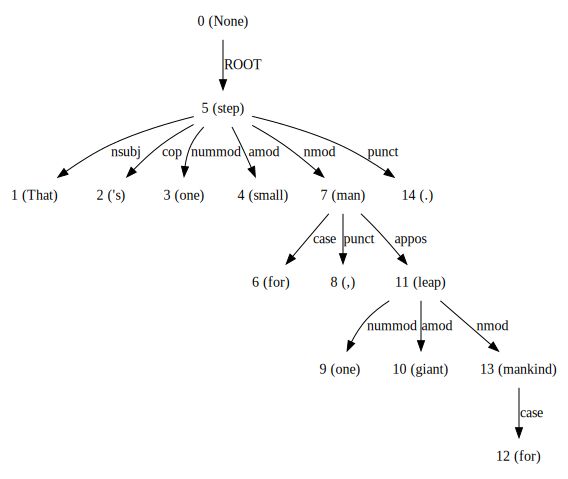

In [12]:
# Graph image doesn't get saved, need to re-run the code
source

In [13]:
parse, = sdp.raw_parse(phrase4)
print(parse.tree())

(step That 's one small (man for , (leap one giant (mankind for))) .)


In [14]:
for gov, dep, dependent in parse.triples():
    print(gov, dep, dependent)

('step', 'NN') nsubj ('That', 'DT')
('step', 'NN') cop ("'s", 'VBZ')
('step', 'NN') nummod ('one', 'CD')
('step', 'NN') amod ('small', 'JJ')
('step', 'NN') nmod ('man', 'NN')
('man', 'NN') case ('for', 'IN')
('man', 'NN') punct (',', ',')
('man', 'NN') appos ('leap', 'NN')
('leap', 'NN') nummod ('one', 'CD')
('leap', 'NN') amod ('giant', 'JJ')
('leap', 'NN') nmod ('mankind', 'NN')
('mankind', 'NN') case ('for', 'IN')
('step', 'NN') punct ('.', '.')


In [15]:
parser = CoreNLPParser()
sent, = parser.parse_text(phrase4)
sent.pretty_print()

                            ROOT                                       
                             |                                          
                             S                                         
  ___________________________|_______________________________________   
 |                           VP                                      | 
 |     ______________________|____                                   |  
 |    |                           NP                                 | 
 |    |         __________________|___                               |  
 |    |        |                      PP                             | 
 |    |        |          ____________|____                          |  
 |    |        |         |                 NP                        | 
 |    |        |         |    _____________|____                     |  
 |    |        |         |   |    |             NP                   | 
 |    |        |         |   |    |         ____|________ 

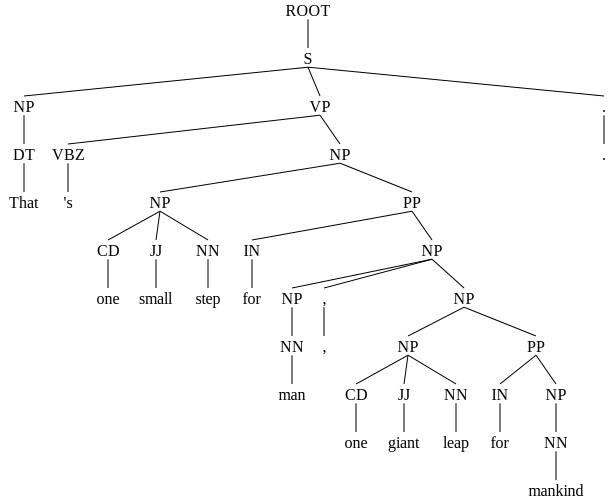

In [16]:
sent

In [17]:
#sent.pos()
#sent.productions()
#sent.pformat_latex_qtree() #compatible with LaTeX qtree package
#sent.height()
for level in range(sent.height()):
    print(sent[level])

(S
  (NP (DT That))
  (VP
    (VBZ 's)
    (NP
      (NP (CD one) (JJ small) (NN step))
      (PP
        (IN for)
        (NP
          (NP (NN man))
          (, ,)
          (NP
            (NP (CD one) (JJ giant) (NN leap))
            (PP (IN for) (NP (NN mankind))))))))
  (. .))


IndexError: list index out of range

In [18]:
listr = []
def iterate(tree):
    if len(tree) > 1:
        for i in range(len(tree)):
            iterate(tree[i])
    else:
        listr.append(tree)

In [19]:
iterate(sent[0])
listr

[Tree('NP', [Tree('DT', ['That'])]),
 Tree('VBZ', ["'s"]),
 Tree('CD', ['one']),
 Tree('JJ', ['small']),
 Tree('NN', ['step']),
 Tree('IN', ['for']),
 Tree('NP', [Tree('NN', ['man'])]),
 Tree(',', [',']),
 Tree('CD', ['one']),
 Tree('JJ', ['giant']),
 Tree('NN', ['leap']),
 Tree('IN', ['for']),
 Tree('NP', [Tree('NN', ['mankind'])]),
 Tree('.', ['.'])]

In [34]:
with open('./Data/barackobamaperfectunion.txt') as f:
    text = f.read()
sents = sent_tokenize(text)

In [38]:
for phrase in sents:
    try:
        sent, = parser.parse_text(phrase)
    except:
        print('----- PARSE ERROR -----')
        print(phrase)
        break
    poss = []
    words = []
    for word in sent.pos():
        poss.append(word[1])
        words.append(word[0])

    stop = False
    results=[] 
    for length in range(6,2,-1):
        for i in range(len(poss)-length+1):
            for j in range(len(poss)-length+1):
                if i != j:
                    if poss[i:i+length]==poss[j:j+length]:
                        results.append([i,j,length])
                        stop = True
                        break
            if stop: break
        if stop: break

    for result in results:
        print(words[result[0]:result[0]+result[2]])
        print(words[result[1]:result[1]+result[2]])
        print()

[',', 'in', 'a']
[',', 'with', 'these']

['Farmers', 'and', 'scholars']
['statesmen', 'and', 'patriots']

['the', 'convention', 'to', 'a']
['a', 'stalemate', 'until', 'the']

['answer', 'to', 'the', 'slavery']
['citizenship', 'under', 'the', 'law']

['yet', 'words', 'on', 'a', 'parchment']
['and', 'women', 'of', 'every', 'color']

['struggles', ',', 'on', 'the']
['courts', ',', 'through', 'a']

[',', 'more', 'equal', ',', 'more', 'free']
[',', 'more', 'free', ',', 'more', 'caring']

['that', 'we', 'can', 'not', 'solve', 'the']
['that', 'we', 'may', 'not', 'look', 'the']

['faith', 'in', 'the']
['generosity', 'of', 'the']

['a', 'black', 'man', 'from', 'Kenya']
['a', 'white', 'woman', 'from', 'Kansas']

['a', 'white', 'grandfather', 'who', 'survived']
['a', 'white', 'grandmother', 'who', 'worked']

['I', "'ve", 'gone', 'to']
['I', "'ve", 'lived', 'in']

['brothers', ',', 'sisters', ',', 'nieces', ',']
['sisters', ',', 'nieces', ',', 'nephews', ',']

['the', 'idea', 'that']
['the', 'sum'

In [27]:
oba = pd.read_csv('df_encodings.csv')
gwb = pd.read_csv('df_encodings_gwb.csv')